<a href="https://colab.research.google.com/github/fkvivid/DIVER/blob/main/Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()

In [ ]:
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
iris.data[50:,0]

array([7. , 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2, 5. , 5.9, 6. ,
       6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1, 6.3, 6.1, 6.4, 6.6,
       6.8, 6.7, 6. , 5.7, 5.5, 5.5, 5.8, 6. , 5.4, 6. , 6.7, 6.3, 5.6,
       5.5, 5.5, 6.1, 5.8, 5. , 5.6, 5.7, 5.7, 6.2, 5.1, 5.7, 6.3, 5.8,
       7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 7.2, 6.5, 6.4, 6.8, 5.7, 5.8,
       6.4, 6.5, 7.7, 7.7, 6. , 6.9, 5.6, 7.7, 6.3, 6.7, 7.2, 6.2, 6.1,
       6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6. , 6.9, 6.7,
       6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9])

[Problem 1] Select features and categories for practice

In [ ]:
data = pd.DataFrame(data=iris.data[50:])
target = pd.DataFrame(data=iris.target[50:])

In [ ]:
data.drop([1, 3],axis=1, inplace=True)

In [ ]:
data

,0,2
0,7.0,4.7
1,6.4,4.5
2,6.9,4.9
3,5.5,4.0
4,6.5,4.6
...,...,...
95,6.7,5.2
96,6.3,5.0
97,6.5,5.2
98,6.2,5.4


[Problem 2] Data analysis

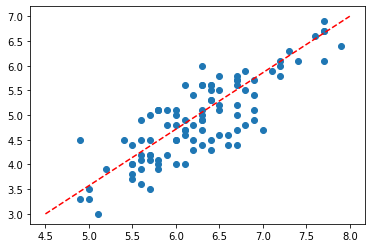

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()

ax.scatter(data[0],data[2])
ax.plot((4.5, 8), (3, 7), linestyle='dashed', color='red')
plt.show()

In [ ]:
target.value_counts()

1    50
2    50
dtype: int64

[Problem 3] Separation of preprocessing / training data and verification data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.25, random_state=123 )

In [ ]:
x_train.shape

(75, 2)

[Problem 4] Pretreatment / standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)
print(scaler.mean_)
x_train_scaler = scaler.transform(x_train)

[6.28266667 4.94533333]


In [ ]:
scaler.fit(x_test)
print(scaler.mean_)
x_test_scaler = scaler.transform(x_test)

[6.2   4.788]


In [ ]:
x_test_scaler

array([[ 6.50944555e-01, -2.62467457e-01],
       [ 1.13915297e+00,  1.27324639e+00],
       [ 3.25472277e-01,  1.13363604e+00],
       [-3.25472277e-01, -4.02077807e-01],
       [-8.13680694e-01,  2.95973941e-01],
       [ 1.30188911e+00, -1.22857108e-01],
       [-8.13680694e-01, -4.02077807e-01],
       [ 1.62736139e-01,  1.69207744e+00],
       [ 2.76651436e+00,  2.25051884e+00],
       [ 4.88208416e-01, -2.62467457e-01],
       [-1.62736139e-01, -1.22857108e-01],
       [ 3.25472277e-01,  7.14804990e-01],
       [ 1.44538727e-15,  1.67532419e-02],
       [ 4.88208416e-01,  4.35584291e-01],
       [ 3.25472277e-01, -6.81298506e-01],
       [-6.50944555e-01, -1.10012955e+00],
       [-1.62736139e-01,  1.56363592e-01],
       [-9.76416832e-01, -9.60519205e-01],
       [-2.11556980e+00, -4.02077807e-01],
       [ 1.62736139e+00,  1.69207744e+00],
       [-3.25472277e-01, -4.02077807e-01],
       [-3.25472277e-01,  1.67532419e-02],
       [-9.76416832e-01, -1.23973990e+00],
       [-8.

[Problem 5] Learning and estimation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(x_train, y_train)
result1 = neigh1.predict(x_test)
result1

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [ ]:
neigh2 = KNeighborsClassifier(n_neighbors=3)
neigh2.fit(x_train, y_train)
result2 = neigh2.predict(x_test)
result2

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1])

In [ ]:
neigh3 = KNeighborsClassifier(n_neighbors=5)
neigh3.fit(x_train, y_train)
result3 = neigh3.predict(x_test)
result3

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

[Problem 6] Evaluation

In [ ]:
from sklearn.metrics import classification_report
print('result1 1_nn report: \n',classification_report(y_test, result1))
print('result2 3_nn report: \n',classification_report(y_test, result2))
print('result3 5_nn report: \n',classification_report(y_test, result3))

result1 1_nn report: 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

result2 3_nn report: 
               precision    recall  f1-score   support

           1       0.81      1.00      0.90        13
           2       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25

result3 5_nn report: 
               precision    recall  f1-score   support

           1       0.76      1.00      0.87        13
           2       1.00      0.67      0.80        12

    accuracy                           0.84        25
   macro avg       0.88      0.83      0.83        25
weigh

In [ ]:
from sklearn.metrics import accuracy_score

# In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

print('result1 1_nn score = ', accuracy_score(y_test, result1))
print('result2 3_nn score = ', accuracy_score(y_test, result2))
print('result3 5_nn score = ', accuracy_score(y_test, result3))

result1 1_nn score =  0.88
result2 3_nn score =  0.88
result3 5_nn score =  0.84


In [ ]:
from sklearn.metrics import precision_score

# The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.
#  The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

# The best value is 1 and the worst value is 0.

print('result1 1_nn macro = ', precision_score(y_test, result1, average='macro'))
print('result1 1_nn micro = ', precision_score(y_test, result1, average='micro'))
print('result1 1_nn weighted = ', precision_score(y_test, result1, average='weighted'))
print('result1 1_nn None = ', precision_score(y_test, result1, average=None))
print('')

print('result2 3_nn macro = ', precision_score(y_test, result2, average='macro'))
print('result2 3_nn micro = ', precision_score(y_test, result2, average='micro'))
print('result2 3_nn weighted = ', precision_score(y_test, result2, average='weighted'))
print('result2 3_nn None = ', precision_score(y_test, result2, average=None))
print('')

print('result3 5_nn macro = ', precision_score(y_test, result3, average='macro'))
print('result3 5_nn micro = ', precision_score(y_test, result3, average='micro'))
print('result3 5_nn weighted = ', precision_score(y_test, result3, average='weighted'))
print('result3 5_nn None = ', precision_score(y_test, result3, average=None))

result1 1_nn macro =  0.90625
result1 1_nn micro =  0.88
result1 1_nn weighted =  0.9025
result1 1_nn None =  [0.8125 1.    ]

result2 3_nn macro =  0.90625
result2 3_nn micro =  0.88
result2 3_nn weighted =  0.9025
result2 3_nn None =  [0.8125 1.    ]

result3 5_nn macro =  0.8823529411764706
result3 5_nn micro =  0.84
result3 5_nn weighted =  0.8776470588235294
result3 5_nn None =  [0.76470588 1.        ]


In [ ]:
from sklearn.metrics import recall_score

print('result1 1_nn macro = ', recall_score(y_test, result1, average='macro'))
print('result1 1_nn micro = ', recall_score(y_test, result1, average='micro'))
print('result1 1_nn weighted = ', recall_score(y_test, result1, average='weighted'))
print('result1 1_nn None = ', recall_score(y_test, result1, average=None))
print('')

# The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.
#  The recall is intuitively the ability of the classifier to find all the positive samples.

print('result2 3_nn macro = ', recall_score(y_test, result2, average='macro'))
print('result2 3_nn micro = ', recall_score(y_test, result2, average='micro'))
print('result2 3_nn weighted = ', recall_score(y_test, result2, average='weighted'))
print('result2 3_nn None = ', recall_score(y_test, result2, average=None))
print('')

print('result3 5_nn macro = ', recall_score(y_test, result3, average='macro'))
print('result3 5_nn micro = ', recall_score(y_test, result3, average='micro'))
print('result3 5_nn weighted = ', recall_score(y_test, result3, average='weighted'))
print('result3 5_nn None = ', recall_score(y_test, result3, average=None))

result1 1_nn macro =  0.875
result1 1_nn micro =  0.88
result1 1_nn weighted =  0.88
result1 1_nn None =  [1.   0.75]

result2 3_nn macro =  0.875
result2 3_nn micro =  0.88
result2 3_nn weighted =  0.88
result2 3_nn None =  [1.   0.75]

result3 5_nn macro =  0.8333333333333333
result3 5_nn micro =  0.84
result3 5_nn weighted =  0.84
result3 5_nn None =  [1.         0.66666667]


In [ ]:
from sklearn.metrics import f1_score

# The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.
#  The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

# F1 = 2 * (precision * recall) / (precision + recall)
# In the multi-class and multi-label case, this is the average of the F1 score of each class with weighting depending on the average parameter.

print('result1 1_nn macro = ', f1_score(y_test, result1, average='macro'))
print('result1 1_nn micro = ', f1_score(y_test, result1, average='micro'))
print('result1 1_nn weighted = ', f1_score(y_test, result1, average='weighted'))
print('result1 1_nn None = ', f1_score(y_test, result1, average=None))
print('')

print('result2 3_nn macro = ', f1_score(y_test, result2, average='macro'))
print('result2 3_nn micro = ', f1_score(y_test, result2, average='micro'))
print('result2 3_nn weighted = ', f1_score(y_test, result2, average='weighted'))
print('result2 3_nn None = ', f1_score(y_test, result2, average=None))
print('')

print('result3 5_nn macro = ', f1_score(y_test, result3, average='macro'))
print('result3 5_nn micro = ', f1_score(y_test, result3, average='micro'))
print('result3 5_nn weighted = ', f1_score(y_test, result3, average='weighted'))
print('result3 5_nn None = ', f1_score(y_test, result3, average=None))

result1 1_nn macro =  0.8768472906403941
result1 1_nn micro =  0.88
result1 1_nn weighted =  0.8776354679802956
result1 1_nn None =  [0.89655172 0.85714286]

result2 3_nn macro =  0.8768472906403941
result2 3_nn micro =  0.88
result2 3_nn weighted =  0.8776354679802956
result2 3_nn None =  [0.89655172 0.85714286]

result3 5_nn macro =  0.8333333333333333
result3 5_nn micro =  0.8399999999999999
result3 5_nn weighted =  0.8346666666666667
result3 5_nn None =  [0.86666667 0.8       ]


In [ ]:
from sklearn.metrics import confusion_matrix

# By definition a confusion matrix  is such that  is equal to the number of observations known to be in group  and predicted to be in group .

# Thus in binary classification, the count of true negatives is , false negatives is , true positives is  and false positives is .

print('result1 1_n = \n', confusion_matrix(y_test, result1))
print('')
print('result2 3_n = \n', confusion_matrix(y_test, result2))
print('')
print('result3 5_n = \n', confusion_matrix(y_test, result3))


result1 1_n = 
 [[13  0]
 [ 3  9]]

result2 3_n = 
 [[13  0]
 [ 3  9]]

result3 5_n = 
 [[13  0]
 [ 4  8]]


array([1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1])

[Question 7] Visualization


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X.iloc[:,0])-0.5, np.max(X.iloc[:,0])+0.5, step), np.arange(np.min(X.iloc[:,1])-0.5, np.max(X.iloc[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        return (y,target)
        plt.scatter(X[y==target].iloc[:, 0], X[y==target].iloc[:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


In [ ]:
x_train

91    6.9
85    7.7
9     5.2
53    6.3
41    6.1
     ... 
57    7.3
83    6.3
17    5.8
92    5.8
66    6.5
Name: 0, Length: 75, dtype: float64

In [ ]:
x_train[91==2][:,0]

KeyError: ignored

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


(    0
91  2
85  2
9   1
53  2
41  1
.. ..
57  2
83  2
17  1
92  2
66  2

[75 rows x 1 columns], 1)


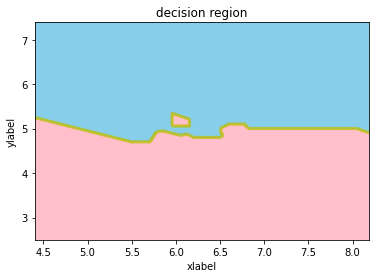

In [ ]:
print(decision_region(x_train, y_train, neigh1))